In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# file1 = open("Uniswiss-tr-nega.csv", "a")
# file2 = open("Uniswiss-tr-posi.csv", "r")

# for line in file2:
#    file1.write(line)

# file1.close()
# file2.close()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_pdb1075.csv to train_pdb1075.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded["train_pdb1075.csv"]))
display(df)

,StringID,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,Result
0,1AKHA,0.049180,0.016393,0.000000,0.098361,0.049180,0.032787,0.000000,0.049180,0.196721,0.049180,0.016393,0.032787,0.049180,0.049180,0.098361,0.114754,0.016393,0.065574,0.016393,0.000000,1
1,1AOII,0.301370,0.198630,0.000000,0.000000,0.000000,0.198630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301370,0.000000,0.000000,0.000000,1
2,1B6WA,0.159420,0.000000,0.072464,0.101449,0.014493,0.057971,0.014493,0.144928,0.101449,0.072464,0.028986,0.000000,0.028986,0.000000,0.115942,0.028986,0.028986,0.028986,0.000000,0.000000,1
3,1C1KA,0.050691,0.009217,0.064516,0.055300,0.064516,0.027650,0.009217,0.105991,0.129032,0.082949,0.023041,0.059908,0.009217,0.041475,0.041475,0.069124,0.013825,0.050691,0.013825,0.078341,1
4,1C6VX,0.049383,0.000000,0.061728,0.086420,0.024691,0.123457,0.012346,0.037037,0.135802,0.061728,0.012346,0.024691,0.024691,0.037037,0.074074,0.061728,0.024691,0.086420,0.024691,0.037037,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,2L8LA,0.093525,0.007194,0.071942,0.079137,0.021583,0.093525,0.043165,0.050360,0.028777,0.079137,0.000000,0.007194,0.035971,0.007194,0.107914,0.014388,0.086331,0.136691,0.021583,0.014388,0
1071,3QDDA,0.063291,0.000000,0.067511,0.113924,0.042194,0.063291,0.021097,0.084388,0.071730,0.075949,0.029536,0.033755,0.025316,0.046414,0.033755,0.067511,0.080169,0.046414,0.004219,0.029536,0
1072,3QBDA,0.135870,0.005435,0.073370,0.057065,0.016304,0.103261,0.040761,0.054348,0.035326,0.119565,0.016304,0.008152,0.057065,0.019022,0.062500,0.019022,0.048913,0.105978,0.008152,0.013587,0
1073,3QB4A,0.059829,0.059829,0.051282,0.068376,0.034188,0.034188,0.034188,0.051282,0.059829,0.076923,0.042735,0.051282,0.076923,0.025641,0.051282,0.076923,0.042735,0.059829,0.017094,0.025641,0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_pdb186.csv to test_pdb186.csv


In [ ]:
df_tst = pd.read_csv(io.BytesIO(uploaded["test_pdb186.csv"]))
display(df_tst)

,StringID,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,Result
0,2MA1A,0.120000,0.000000,0.053333,0.053333,0.026667,0.106667,0.040000,0.026667,0.053333,0.133333,0.000000,0.000000,0.053333,0.026667,0.066667,0.066667,0.066667,0.066667,0.013333,0.026667,1
1,4LC2A,0.060345,0.008621,0.068966,0.086207,0.068966,0.034483,0.008621,0.043103,0.068966,0.120690,0.043103,0.051724,0.043103,0.060345,0.068966,0.034483,0.043103,0.043103,0.000000,0.043103,1
2,4BLFA,0.070796,0.013274,0.066372,0.084071,0.053097,0.057522,0.026549,0.061947,0.079646,0.075221,0.008850,0.039823,0.039823,0.057522,0.084071,0.044248,0.053097,0.013274,0.008850,0.061947,1
3,4BJ1A,0.031348,0.012539,0.040752,0.065831,0.065831,0.028213,0.021944,0.078370,0.094044,0.103448,0.034483,0.068966,0.021944,0.037618,0.021944,0.115987,0.050157,0.059561,0.000000,0.047022,1
4,4BHXA,0.010638,0.021277,0.021277,0.127660,0.042553,0.021277,0.021277,0.063830,0.095745,0.148936,0.021277,0.042553,0.063830,0.042553,0.063830,0.010638,0.063830,0.053191,0.021277,0.042553,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,4FL4C,0.087227,0.003115,0.071651,0.068536,0.043614,0.084112,0.024922,0.087227,0.046729,0.056075,0.018692,0.052960,0.049844,0.012461,0.021807,0.052960,0.068536,0.109034,0.003115,0.037383,0
182,4AXNA,0.121951,0.000000,0.067073,0.039634,0.039634,0.082317,0.009146,0.070122,0.064024,0.076220,0.024390,0.082317,0.033537,0.039634,0.024390,0.039634,0.051829,0.054878,0.021341,0.057927,0
183,4AXQA,0.067485,0.036810,0.030675,0.055215,0.042945,0.055215,0.030675,0.049080,0.061350,0.085890,0.024540,0.055215,0.036810,0.018405,0.067485,0.092025,0.036810,0.116564,0.000000,0.036810,0
184,4FJ6A,0.059273,0.003824,0.063098,0.049713,0.021033,0.080306,0.022945,0.072658,0.055449,0.074570,0.032505,0.051625,0.047801,0.047801,0.045889,0.070746,0.082218,0.070746,0.024857,0.022945,0


In [ ]:
df_tst.isnull().sum().sort_values(ascending = False)

Result      0
Y           0
A           0
C           0
D           0
E           0
F           0
G           0
H           0
I           0
K           0
L           0
M           0
N           0
P           0
Q           0
R           0
S           0
T           0
V           0
W           0
StringID    0
dtype: int64

In [ ]:
# frames = [nega_df, posi_df]
# df = pd.concat(frames)

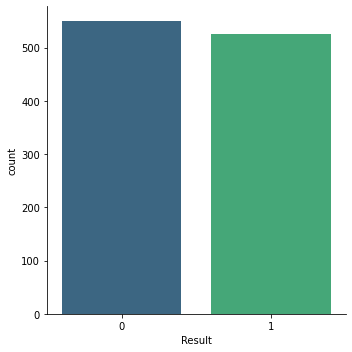

In [ ]:
sns.catplot(x = 'Result', kind = 'count', data = df, palette='viridis')

In [ ]:
df['Result'].value_counts()

0    550
1    525
Name: Result, dtype: int64

In [ ]:
from sklearn.utils import resample
df_0 = df[df['Result'] == 0]
df_1 = df[df['Result'] == 1]

In [ ]:
df_1_over_sampling = resample(df_1 , n_samples = 550, replace = True, random_state = 123)

In [ ]:
df_balanced = pd.concat([df_0, df_1_over_sampling])

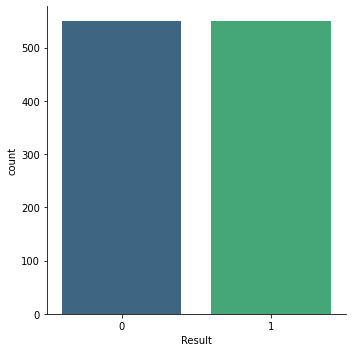

In [ ]:
sns.catplot(x = 'Result', kind = 'count', data = df_balanced, palette='viridis')

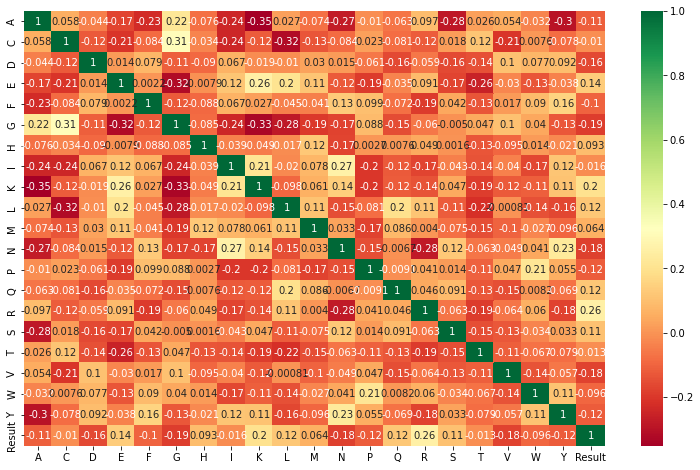

In [ ]:
from pylab import savefig
plt.figure(figsize=(13,8))
svm = sns.heatmap(df.corr(), annot= True, cmap = 'RdYlGn')
figure = svm.get_figure()    
figure.savefig('corr_pdb.png', dpi=400)

In [ ]:
df_balanced.keys()

Index(['StringID', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N',
       'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'Result'],
      dtype='object')

In [ ]:
X = df.drop(['Result', 'StringID','Y'], axis = 1)
y = df['Result']

#Train set val set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [ ]:
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow import keras
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model():
    model = Sequential()

    # Input Layer
    model.add(Dense(units = 64, activation = 'relu', input_shape = [len(X.keys())]))
    model.add(Dropout(0.2))

    # Hidden Layer - I
    model.add(Dense(units = 128, activation= 'relu'))
    model.add(Dropout(0.2))

    # Hidden Layer - II
    model.add(Dense(units = 128, activation= 'relu'))
    model.add(Dropout(0.2))

    # Output Layer
    model.add(Dense(units = 1, activation='sigmoid'))
  
    # Optimizers 
    # Learning rate 'alpha' = (0.00001 - 0.1) 
    optimizers = Adam(learning_rate= 0.001)

    # Multiclass - categorical_crossentropy
    model.compile(loss = 'binary_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
    
    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                

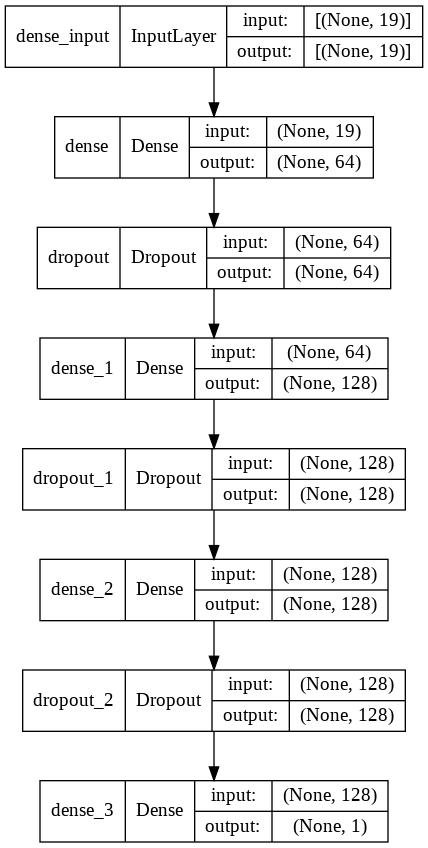

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, epochs = 500, batch_size= 25, validation_split = 0.2)

Epoch 1/500
25/25 [==============================] - 2s 14ms/step - loss: 0.6919 - accuracy: 0.5591 - val_loss: 0.6887 - val_accuracy: 0.6623
Epoch 2/500
25/25 [==============================] - 0s 13ms/step - loss: 0.6871 - accuracy: 0.6007 - val_loss: 0.6805 - val_accuracy: 0.6821
Epoch 3/500
25/25 [==============================] - 0s 14ms/step - loss: 0.6767 - accuracy: 0.6689 - val_loss: 0.6652 - val_accuracy: 0.6887
Epoch 4/500
25/25 [==============================] - 0s 7ms/step - loss: 0.6602 - accuracy: 0.6406 - val_loss: 0.6314 - val_accuracy: 0.7285
Epoch 5/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6160 - accuracy: 0.6705 - val_loss: 0.5870 - val_accuracy: 0.7219
Epoch 6/500
25/25 [==============================] - 0s 4ms/step - loss: 0.5910 - accuracy: 0.7138 - val_loss: 0.5898 - val_accuracy: 0.6954
Epoch 7/500
25/25 [==============================] - 0s 4ms/step - loss: 0.5775 - accuracy: 0.6889 - val_loss: 0.5539 - val_accuracy: 0.7152
Epoch 8/50

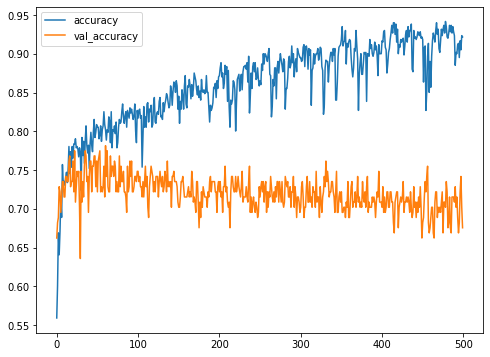

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize = (8,6))

In [ ]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 1.2167 - accuracy: 0.6780


[1.2167010307312012, 0.6780185699462891]

In [ ]:
predict = model.predict(X_test)
yhat = np.round(predict)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[ 87,  81],
       [ 23, 132]])

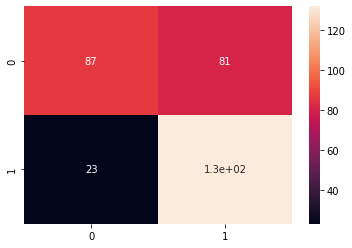

In [ ]:
sns.heatmap(confusion_matrix(y_test, yhat), annot = True)


In [ ]:
acc = accuracy_score(y_test, yhat)
pre = precision_score(y_test, yhat)
rec = recall_score(y_test, yhat)
f1 = f1_score(y_test, yhat)

print("Accuracy =", acc)
print("Precision =",pre)
print("Recall =", rec)
print("f1 =", f1)

Accuracy = 0.6780185758513931
Precision = 0.6197183098591549
Recall = 0.8516129032258064
f1 = 0.7173913043478259


#Test data

In [ ]:
df_tst = df_tst.sample(frac=1)

In [ ]:
df_tst.keys()

Index(['StringID', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N',
       'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'Result'],
      dtype='object')

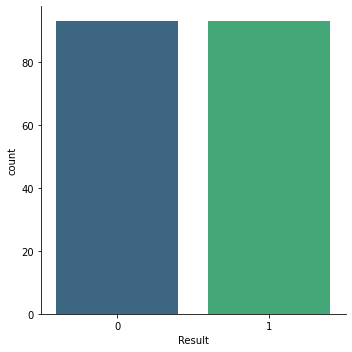

In [ ]:
sns.catplot(x = 'Result', kind = 'count', data = df_tst, palette='viridis')

In [ ]:
X_tst = df_tst.drop(['Result', 'StringID', 'Y'], axis = 1)
y_tst = df_tst['Result']

In [ ]:
model.evaluate(X_tst, y_tst)

6/6 [==============================] - 0s 3ms/step - loss: 1.3263 - accuracy: 0.6505


[1.326264500617981, 0.6505376100540161]

In [ ]:
predict = model.predict(X_tst)
yhat = np.round(predict)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_tst, yhat)

array([[36, 57],
       [ 8, 85]])

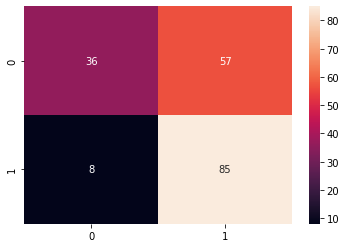

In [ ]:
svm = sns.heatmap(confusion_matrix(y_tst, yhat), annot = True)
figure = svm.get_figure()    
figure.savefig('test_conf_pdb186.png', dpi=400)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_tst, yhat)
pre = precision_score(y_tst, yhat)
rec = recall_score(y_tst, yhat)
f1 = f1_score(y_tst, yhat)

print("Accuracy =", acc)
print("Precision =",pre)
print("Recall =", rec)
print("f1 =", f1)

Accuracy = 0.6505376344086021
Precision = 0.5985915492957746
Recall = 0.9139784946236559
f1 = 0.7234042553191489


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
predictions_1 = clf.predict(X_test)

In [ ]:

acc = accuracy_score(y_test, predictions_1)
pre = precision_score(y_test, predictions_1)
rec = recall_score(y_test, predictions_1)
f1 = f1_score(y_test, predictions_1)

print("Accuracy =", acc)
print("Precision =",pre)
print("Recall =", rec)
print("f1 =", f1)

Accuracy = 0.6068111455108359
Precision = 0.71875
Recall = 0.2967741935483871
f1 = 0.42009132420091316


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


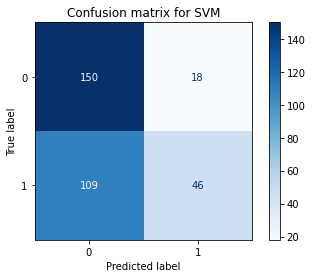

In [ ]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,)
plt.title('Confusion matrix for SVM')
plt.show(matrix)
plt.show()

# svm = sns.heatmap(confusion_matrix(y_test, yhat), annot = True)
# figure = svm.get_figure()    
# figure.savefig('test_conf_pdb186.png', dpi=400)

In [ ]:
predictions2 = clf.predict(X_tst)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


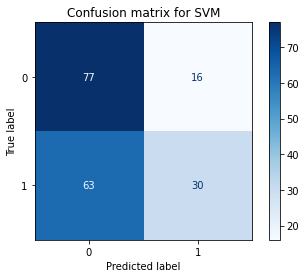

In [ ]:

matrix = plot_confusion_matrix(clf, X_tst, y_tst,
                                 cmap=plt.cm.Blues)
plt.title('Confusion matrix for SVM')
plt.show(matrix)
plt.show()

In [ ]:
acc = accuracy_score(y_tst, predictions2)
pre = precision_score(y_tst, predictions2)
rec = recall_score(y_tst, predictions2)
f1 = f1_score(y_tst, predictions2)
print("Accuracy =", acc)
print("Precision =",pre)
print("Recall =", rec)
print("f1 =", f1)

Accuracy = 0.5752688172043011
Precision = 0.6521739130434783
Recall = 0.3225806451612903
f1 = 0.43165467625899284
